In [1]:
from inda_mir.modeling.models import *
from inda_mir.modeling.evaluation import *
from inda_mir.loaders import load_data_partition

In [4]:
data_partition = 'our_extractor_random_split.data'

In [5]:
data = load_data_partition(data_partition)

In [6]:
data.get_features_names()

Index(['average_loudness', 'barkbands_median_0', 'barkbands_median_1',
       'barkbands_median_10', 'barkbands_median_11', 'barkbands_median_12',
       'barkbands_median_13', 'barkbands_median_14', 'barkbands_median_15',
       'barkbands_median_16',
       ...
       'spectral_contrast_valleys_median_5',
       'spectral_contrast_valleys_stdev_0',
       'spectral_contrast_valleys_stdev_1',
       'spectral_contrast_valleys_stdev_2',
       'spectral_contrast_valleys_stdev_3',
       'spectral_contrast_valleys_stdev_4',
       'spectral_contrast_valleys_stdev_5', 'spectral_rms_dvar',
       'zerocrossingrate_max', 'zerocrossingrate_median'],
      dtype='object', length=253)

In [7]:
X_train, y_train = data.get_numpy_train_data()
X_test, y_test = data.get_numpy_test_data()

# LightGBM - All extracted subset

In [8]:
lgbm = LightGBMClassifier()
lgbm.fit(X_train, y_train)


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003874 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 64515
[LightGBM] [Info] Number of data points in the train set: 6409, number of used features: 253
[LightGBM] [Info] Start training from score -1.572524
[LightGBM] [Info] Start training from score -1.490979
[LightGBM] [Info] Start training from score -1.472441
[LightGBM] [Info] Start training from score -1.616327
[LightGBM] [Info] Start training from score -1.970872
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


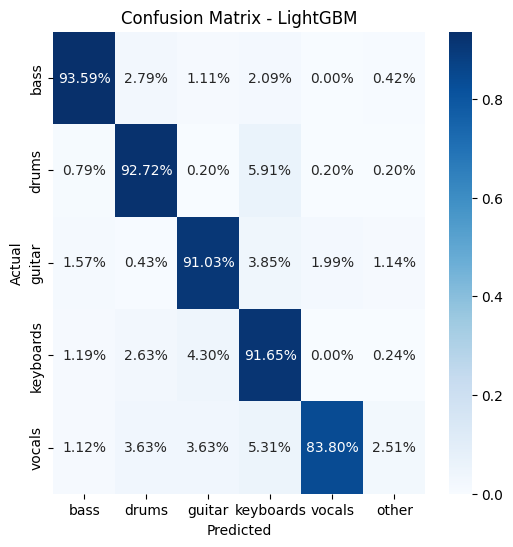

In [9]:
plot_confusion_matrix(y_test, X_test, lgbm)

In [10]:
print_classification_report(y_test, lgbm.predict(X_test), data.labels)

              precision    recall  f1-score   support

        bass       0.97      0.94      0.95       718
       drums       0.91      0.93      0.92       508
      guitar       0.94      0.91      0.93       702
   keyboards       0.81      0.92      0.86       419
      vocals       0.95      0.84      0.89       358

   micro avg       0.92      0.91      0.92      2705
   macro avg       0.92      0.91      0.91      2705
weighted avg       0.92      0.91      0.92      2705



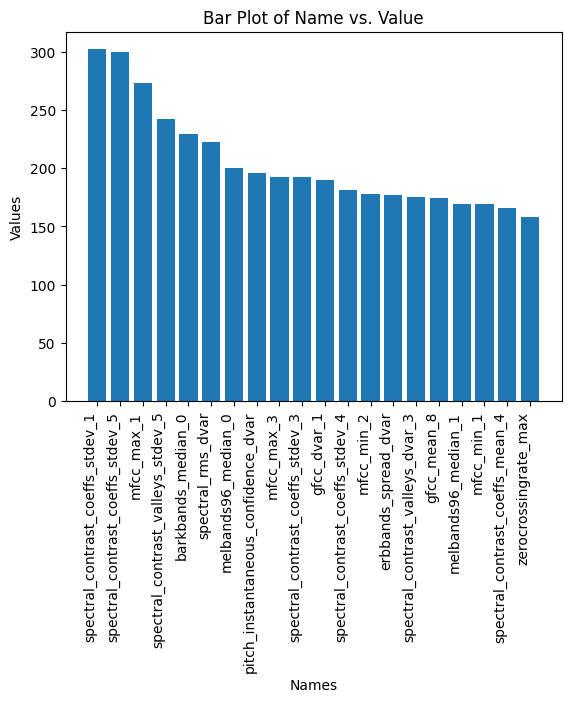

In [11]:
plot_feature_importance(lgbm.get_feature_importance(data.get_features_names()))

In [12]:
lgbm.save_model('../models/', 'lgbm_oe_rs_27102023')

# LightGBM - Only top-30

In [11]:
subset = [('spectral_contrast_coeffs_stdev_1', 130),
 ('melbands96_median_0', 90),
 ('gfcc_mean_1', 80),
 ('spectral_centroid_mean', 79),
#  ('spectral_contrast_valleys_dvar2_5', 73),
 ('mfcc_stdev_6', 65),
 ('mfcc_min_6', 63),
#  ('spectral_rms_dvar2', 63),
 ('melbands96_median_90', 61),
 ('mfcc_stdev_4', 58),
 ('spectral_contrast_valleys_stdev_5', 57),
 ('zerocrossingrate_max', 57),
 ('average_loudness', 56),
 ('mfcc_max_3', 54),
 ('zerocrossingrate_median', 54),
 ('spectral_contrast_coeffs_mean_2', 51),
 ('mfcc_mean_3', 50),
 ('pitch_instantaneous_confidence_mean', 49),
 ('erbbands_spread_dvar', 46),
 ('loudness_ebu128_short_term_min', 46),
#  ('melbands_flatness_db_min', 45),
 ('barkbands_median_0', 44),
 ('pitch_instantaneous_confidence_dvar', 43),
#  ('erbbands_spread_dvar2', 41),
 ('melbands96_median_31', 41),
 ('mfcc_max_2', 41),
#  ('gfcc_dvar2_0', 40),
 ('gfcc_mean_7', 40),
 ('mfcc_median_7', 40),
 ('spectral_contrast_valleys_median_4', 40)]

subset = [f[0] for f in subset] + ['filename', 'frame', 'track_id']

In [12]:
data.X_train = data.X_train[subset]
data.X_test = data.X_test[subset]

In [13]:
X_train, y_train = data.get_numpy_train_data()
X_test, y_test = data.get_numpy_test_data()

In [14]:
lgbm = LightGBMClassifier()
lgbm.fit(X_train, y_train)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001163 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6375
[LightGBM] [Info] Number of data points in the train set: 6409, number of used features: 25
[LightGBM] [Info] Start training from score -1.572524
[LightGBM] [Info] Start training from score -1.490979
[LightGBM] [Info] Start training from score -1.472441
[LightGBM] [Info] Start training from score -1.616327
[LightGBM] [Info] Start training from score -1.970872


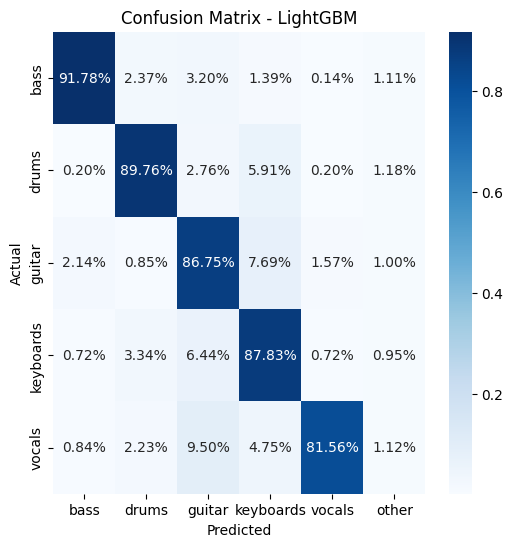

In [15]:
plot_confusion_matrix(y_test, X_test, lgbm)

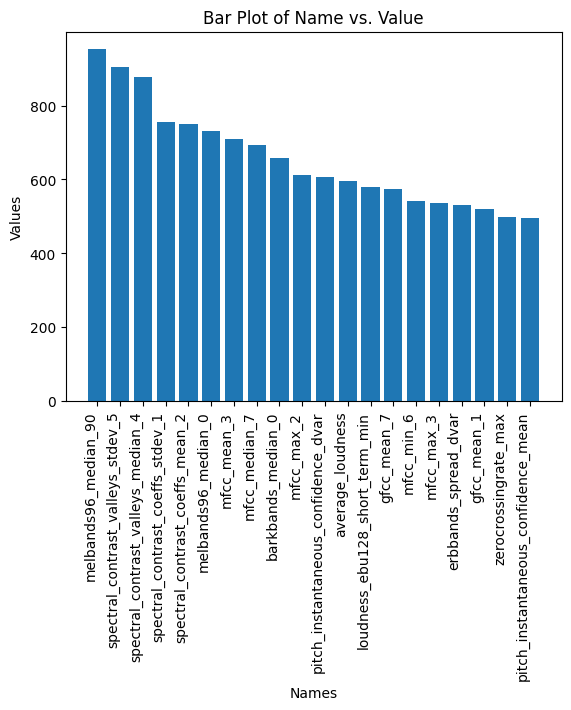

In [18]:
plot_feature_importance(lgbm.get_feature_importance(data.get_features_names()))